In [1]:
import pandas as pd
aparts_test = pd.read_csv('Datasets/aparts_test.csv')
aparts_test.head()

,unit_id,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,...,has_store,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
0,dfbe99af54363f43,0d6c4dfc,67.62,3.0,NaN,4.0,NaN,4.554,23.0,0.096,...,no,2024-04,a6d54bd1,503302.80,NaN,34.25,62.03,1.0,31.08,90.999400
1,94f784f566bdc4ef,0c238f18,83.31,5.0,NaN,4.0,NaN,1.356,38.0,0.057,...,yes,2023-12,0ab06839,532365.70,NaN,48.82,44.38,1.0,23.38,94.474225
2,1c3715ce01ed03f8,2a6d5c01,26.94,2.0,6.0,8.0,2022.0,2.640,16.0,0.373,...,no,2024-01,693f303c,711900.28,2.84,59.83,50.81,1.0,5.35,94.221214
3,b473f22502b77974,NaN,63.33,3.0,2.0,4.0,2024.0,0.409,29.0,0.366,...,no,2024-02,6900ba06,1306800.91,0.00,62.37,73.27,1.0,30.42,106.046514
4,2370df73d60d96d1,0d6c4dfc,53.04,2.0,4.0,4.0,1980.0,2.247,22.0,0.156,...,yes,2023-10,570cb745,221909.30,62.64,37.52,41.75,1.0,16.85,93.081163


## Missing values

In [2]:
# All the distributions are slighlty righ-skewed (mean higher than median). Let's replace the missing values for this variables with median
smaller_nulls_without_lift = ['floor_max','dist_sch','dist_clinic','dist_post','dist_kind','dist_rest','dist_uni','dist_pharma']
aparts_test[smaller_nulls_without_lift] = aparts_test[smaller_nulls_without_lift].apply(lambda x:x.fillna(x.median()))


In [3]:
import numpy as np

# Randomly fill NaN values in 'has_lift' with 'yes' or 'no'
missing_indices = aparts_test['has_lift'].isnull()

# Generate random choices for the missing values
random_choices = np.random.choice(['yes', 'no'], size=missing_indices.sum())

# Fill the missing values with the random choices
aparts_test.loc[missing_indices, 'has_lift'] = random_choices

# Optionally, you can convert it to a categorical type if needed
aparts_test['has_lift'] = aparts_test['has_lift'].astype('category')


In [4]:
# For categorical variable that miss a lot of values, let's treat the nulls as a seperate category
big_nulls_cat = ['obj_type','build_mat','cond_class']
for x in big_nulls_cat:
    aparts_test[x] = aparts_test[x].fillna('NULL')

In [5]:
aparts_test[['floor_no','infrastructure_quality']] = aparts_test[['floor_no','infrastructure_quality']].apply(lambda x:x.fillna(x.median()))

In [6]:
aparts_test['year_built'] = aparts_test['year_built'].fillna(aparts_test['year_built'].median())

In [7]:
aparts_test.isnull().sum()

unit_id                       0
obj_type                      0
dim_m2                        0
n_rooms                       0
floor_no                      0
floor_max                     0
year_built                    0
dist_centre                   0
n_poi                         0
dist_sch                      0
dist_clinic                   0
dist_post                     0
dist_kind                     0
dist_rest                     0
dist_uni                      0
dist_pharma                   0
own_type                      0
build_mat                     0
cond_class                    0
has_park                      0
has_balcony                   0
has_lift                      0
has_sec                       0
has_store                     0
src_month                     0
loc_code                      0
market_volatility             0
infrastructure_quality        0
neighborhood_crime_rate       0
popularity_index              0
green_space_ratio             0
estimate

In [8]:
# Let's drop the varaible unit_id, as it contains uniqeu identifier of an apartment and has no added value for price prediction modelling
aparts_test = aparts_test.drop(columns='unit_id')

In [9]:
# integers
int_cols = ['n_rooms','n_poi','floor_no','floor_max','year_built']
aparts_test[int_cols] = aparts_test[int_cols].astype('Int64') 

In [10]:
# booleans
bool_cols = ['has_park','has_balcony','has_lift','has_sec','has_store']
aparts_test[bool_cols] = aparts_test[bool_cols].apply(lambda s: s.map({'yes': True, 'no': False}))

In [11]:
# categoricals
cat_cols = ['obj_type','own_type','build_mat','cond_class','loc_code']
aparts_test[cat_cols] = aparts_test[cat_cols].astype('category')

In [12]:
# month → datetime
aparts_test['src_month'] = pd.to_datetime(aparts_test['src_month'], format='%Y-%m')

In [13]:
aparts_test.isnull().sum()

obj_type                      0
dim_m2                        0
n_rooms                       0
floor_no                      0
floor_max                     0
year_built                    0
dist_centre                   0
n_poi                         0
dist_sch                      0
dist_clinic                   0
dist_post                     0
dist_kind                     0
dist_rest                     0
dist_uni                      0
dist_pharma                   0
own_type                      0
build_mat                     0
cond_class                    0
has_park                      0
has_balcony                   0
has_lift                      0
has_sec                       0
has_store                     0
src_month                     0
loc_code                      0
market_volatility             0
infrastructure_quality        0
neighborhood_crime_rate       0
popularity_index              0
green_space_ratio             0
estimated_maintenance_cost    0
global_e

## EDA

In [14]:
# For simplicity of copy pasting, let's name for now aparts_test as aparts. I will change it at the end
aparts = aparts_test

In [15]:
# Let's add back the target variable
aparts_price = pd.read_csv('Datasets/y_test.csv')
aparts_price.head()

,price_z
0,460197.38
1,652758.54
2,763524.27
3,1266296.70
4,246145.72


In [16]:
aparts['price_z'] = aparts_price['price_z']

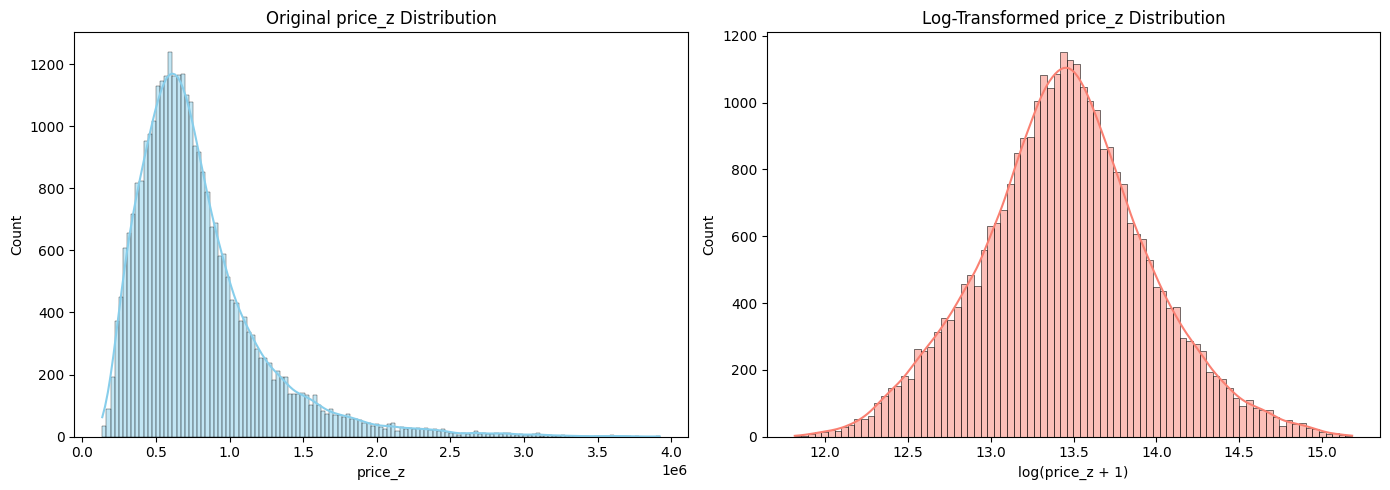

In [17]:
# We can skip the correaltion matrix part
# We can see that the distribution of prices may be slightly righ skewed. LEts compare it with log version of the varaible
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a log-transformed version (add small constant to avoid log(0))
aparts['log_price_z'] = np.log1p(aparts['price_z'])

# Plot side-by-side distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(aparts['price_z'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original price_z Distribution')
axes[0].set_xlabel('price_z')

sns.histplot(aparts['log_price_z'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Log-Transformed price_z Distribution')
axes[1].set_xlabel('log(price_z + 1)')

plt.tight_layout()
plt.show()

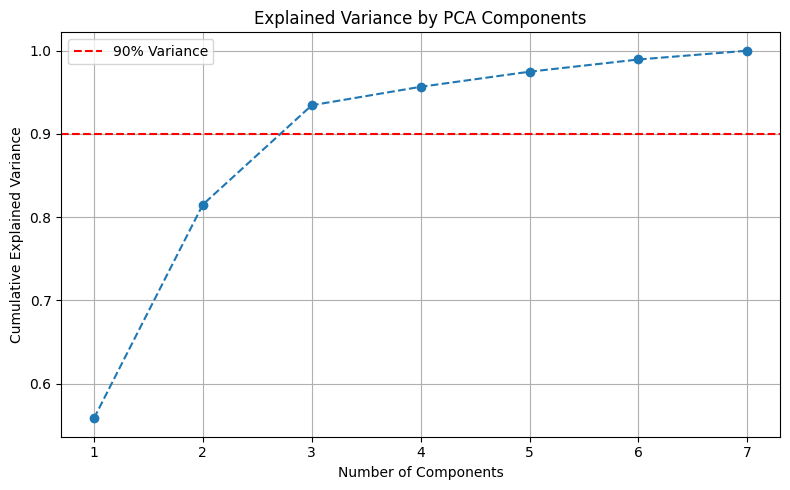

In [18]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dist_vars = ['dist_sch', 'dist_clinic', 'dist_post',
             'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma']

# Fit PCA with all components
pca_full = PCA()
pca_full.fit(aparts[dist_vars])

# Plot cumulative explained variance
cum_explained_var = pca_full.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# The elbow point is at 3 Principal components. Together they explain more than 90% of variance. That's nice - we reduced the dist dimensionality
# by 2x (from 6 to 3 features)

# Fit and transform with optimal number of components
pca = PCA(n_components=2)  # Replace with your chosen number
X_pca = pca.fit_transform(aparts[dist_vars])

# Add principal components to the dataset
aparts['dist_pc1'] = X_pca[:, 0]
aparts['dist_pc2'] = X_pca[:, 1]

In [20]:
# Let's drop the dist variables
aparts = aparts.drop(columns= dist_vars)

In [21]:
aparts = aparts.drop(columns='infrastructure_quality')

In [22]:
# Standarozation
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Log transform 'dist_centre' (with handling for zero/negative values)
aparts['dist_centre_log'] = np.log(aparts['dist_centre'].replace(0, np.nan) + 1)  # Adding 1 to avoid log(0)

# Step 2: If you want, you can also standardize the transformed variable
scaler = StandardScaler()
aparts['dist_centre_log_scaled'] = scaler.fit_transform(aparts[['dist_centre_log']])

# Check the transformed dataset
print(aparts[['dist_centre', 'dist_centre_log', 'dist_centre_log_scaled']].head())


   dist_centre  dist_centre_log  dist_centre_log_scaled
0        4.554         1.714518                0.329961
1        1.356         0.856965               -1.152565
2        2.640         1.291984               -0.400512
3        0.409         0.342880               -2.041308
4        2.247         1.177731               -0.598029


In [23]:
# The distribution is slightly right skewed. Let's log-standarize the aparts['dim_m2']
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Log-transform to reduce skewness
aparts['dim_m2_log'] = np.log1p(aparts['dim_m2'])  # log1p handles zero safely

# Step 2: Standardize the log-transformed variable
scaler = StandardScaler()
aparts['dim_m2_log_std'] = scaler.fit_transform(aparts[['dim_m2_log']])


In [24]:
aparts = aparts.drop(columns='dim_m2')

In [25]:
discrete_var = ['n_rooms', 'floor_no', 'floor_max', 'year_built']
for var in discrete_var:
    print(aparts[var].unique())

<IntegerArray>
[3, 5, 2, 1, 4, 6]
Length: 6, dtype: Int64
<IntegerArray>
[ 3,  6,  2,  4,  9,  1,  5, 15, 10,  8, 11,  7, 13, 23, 12, 14, 18, 17, 16,
 29, 24, 20, 22, 21]
Length: 24, dtype: Int64
<IntegerArray>
[ 4,  8, 10,  2,  6,  3, 17,  5,  9, 11, 23,  7,  1, 14, 12, 13, 15, 16, 19,
 28, 18, 24, 20, 27, 22, 25, 29, 26, 21]
Length: 29, dtype: Int64
<IntegerArray>
[1996, 2022, 2024, 1980, 1976, 1896, 1970, 2005, 1962, 1958,
 ...
 1852, 1873, 1877, 1876, 1881, 1882, 1855, 1892, 1916, 1856]
Length: 157, dtype: Int64


In [26]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you already have a DataFrame 'aparts'
# aparts = pd.read_csv('your_data.csv')  # Uncomment if reading from CSV

# Step 1: Create 'years_since_2000' for 'year_built'
aparts['years_since_2000'] = aparts['year_built'] - 2000

# Step 2: Standardize 'years_since_2000'
scaler = StandardScaler()
aparts['years_since_2000_scaled'] = scaler.fit_transform(aparts[['years_since_2000']])

# Step 3: Standardize other discrete numeric variables: 'n_rooms', 'floor_no', and 'floor_max'
# You can standardize these as long as their relationship with the target variable is linear
# If these variables have ordinal relationships (e.g., 'n_rooms'), they can be standardized as well.

# Standardizing 'n_rooms', 'floor_no', 'floor_max'
aparts['n_rooms_scaled'] = scaler.fit_transform(aparts[['n_rooms']])
aparts['floor_no_scaled'] = scaler.fit_transform(aparts[['floor_no']])
aparts['floor_max_scaled'] = scaler.fit_transform(aparts[['floor_max']])

# Optionally, if you want to remove the original columns after transformation:
aparts.drop(['year_built', 'n_rooms', 'floor_no', 'floor_max'], axis=1, inplace=True)

# Check the transformed dataset
print(aparts.head())


   obj_type  dist_centre  n_poi  own_type build_mat cond_class  has_park  \
0  0d6c4dfc        4.554     23  bfb8fe10  7ceffe3b       NULL     False   
1  0c238f18        1.356     38  12631efb  7ceffe3b       NULL     False   
2  2a6d5c01        2.640     16  12631efb  7ceffe3b       NULL      True   
3      NULL        0.409     29  12631efb      NULL       NULL     False   
4  0d6c4dfc        2.247     22  12631efb  7f8c00f9       NULL     False   

   has_balcony has_lift  has_sec  ...  dist_pc2 dist_centre_log  \
0         True    False    False  ... -0.722595        1.714518   
1        False    False    False  ... -0.570659        0.856965   
2        False     True     True  ...  0.117712        1.291984   
3         True    False    False  ... -0.341446        0.342880   
4         True    False    False  ...  0.995827        1.177731   

  dist_centre_log_scaled  dim_m2_log  dim_m2_log_std  years_since_2000  \
0               0.329961    4.228584        0.557335              

In [27]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Log transform 'n_poi' with log1p (log(1 + x) to handle zeros)
aparts['n_poi'] = np.log1p(aparts['n_poi'])

# Step 2: Standardize 'n_poi' - reshape it to 2D for StandardScaler
scaler = StandardScaler()
aparts['n_poi'] = scaler.fit_transform(aparts[['n_poi']])

In [28]:
aparts[['market_volatility',
 'neighborhood_crime_rate', 'popularity_index',
       'green_space_ratio', 'estimated_maintenance_cost',
       'global_economic_index']].describe()

,market_volatility,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
count,3.129100e+04,31291.000000,31291.000000,31291.000000,31291.000000,31291.000000
mean,7.867963e+05,50.063605,49.943797,0.999624,17.612189,99.730391
std,4.476381e+05,28.897226,10.021332,0.000489,10.043295,5.863583
min,1.111484e+05,0.000000,8.280000,0.998000,2.150000,89.913197
25%,4.946964e+05,24.760000,43.250000,0.999000,10.210000,93.832978
50%,6.871879e+05,50.130000,49.860000,1.000000,15.630000,100.432695
75%,9.482045e+05,75.060000,56.730000,1.000000,22.660000,105.246148
max,4.666297e+06,100.000000,90.230000,1.000000,80.680000,109.224288


In [29]:
aparts = aparts.drop(columns='green_space_ratio')

In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Apply log1p transformation to the specified variables
aparts['market_volatility'] = np.log1p(aparts['market_volatility'])
aparts['popularity_index'] = np.log1p(aparts['popularity_index'])
aparts['estimated_maintenance_cost'] = np.log1p(aparts['estimated_maintenance_cost'])

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the transformed variables
aparts[['market_volatility', 'popularity_index', 'estimated_maintenance_cost']] = \
    scaler.fit_transform(aparts[['market_volatility', 'popularity_index', 'estimated_maintenance_cost']])

# Check the transformed and standardized dataset
print(aparts[['market_volatility', 'popularity_index', 'estimated_maintenance_cost']].head())


   market_volatility  popularity_index  estimated_maintenance_cost
0          -0.603159          1.122945                    1.288031
1          -0.494447         -0.456795                    0.768844
2           0.068313          0.180371                   -1.775942
3           1.244542          1.911981                    1.248708
4          -2.189001         -0.743866                    0.179119


In [31]:
binary_flags = ['has_park', 'has_balcony', 'has_lift', 'has_sec',
       'has_store']
aparts[binary_flags]

,has_park,has_balcony,has_lift,has_sec,has_store
0,False,True,False,False,False
1,False,False,False,False,True
2,True,False,True,True,False
3,False,True,False,False,False
4,False,True,False,False,True
...,...,...,...,...,...
31286,True,True,True,False,False
31287,True,True,True,True,False
31288,False,False,True,False,False
31289,False,True,True,False,False


In [32]:
# Convert the boolean values to 0/1 using .astype(int)
aparts[binary_flags] = aparts[binary_flags].astype(int)

# Check the transformed dataset
print(aparts[binary_flags].head())


   has_park  has_balcony  has_lift  has_sec  has_store
0         0            1         0        0          0
1         0            0         0        0          1
2         1            0         1        1          0
3         0            1         0        0          0
4         0            1         0        0          1


In [33]:
string_cats = ['obj_type', 'own_type', 'build_mat', 'cond_class', 'src_month', 'loc_code']
aparts[string_cats]

,obj_type,own_type,build_mat,cond_class,src_month,loc_code
0,0d6c4dfc,bfb8fe10,7ceffe3b,NULL,2024-04-01,a6d54bd1
1,0c238f18,12631efb,7ceffe3b,NULL,2023-12-01,0ab06839
2,2a6d5c01,12631efb,7ceffe3b,NULL,2024-01-01,693f303c
3,NULL,12631efb,NULL,NULL,2024-02-01,6900ba06
4,0d6c4dfc,12631efb,7f8c00f9,NULL,2023-10-01,570cb745
...,...,...,...,...,...,...
31286,0d6c4dfc,12631efb,NULL,a2881958,2024-03-01,0ab06839
31287,2a6d5c01,12631efb,7ceffe3b,NULL,2023-11-01,693f303c
31288,NULL,12631efb,NULL,NULL,2024-06-01,e0cff11b
31289,0d6c4dfc,12631efb,NULL,NULL,2024-06-01,693f303c


In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# — 1) Assume you already have your DataFrame loaded as `aparts`:
# aparts = pd.read_csv("…")

# — 2) Extract month number from `src_month` and drop the original date column
aparts['src_monthn'] = pd.to_datetime(
    aparts['src_month'],
    format='%Y-%m-%d'
).dt.month
aparts.drop(columns=['src_month'], inplace=True)

# — 3) List the categorical columns you want to encode
cat_cols = ['obj_type', 'own_type', 'build_mat', 'cond_class', 'loc_code']

# — 4) Fit an OneHotEncoder (dropping the first level of each to avoid collinearity)
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
ohe.fit(aparts[cat_cols])

# — 5) Transform those columns into a dense array, build a DataFrame of dummy columns
dummy_array = ohe.transform(aparts[cat_cols]).toarray()
dummy_cols  = ohe.get_feature_names_out(cat_cols)
dummies_df  = pd.DataFrame(
    dummy_array,
    columns=dummy_cols,
    index=aparts.index
)

# — 6) Drop the raw categoricals from `aparts` and concatenate the new dummies
aparts.drop(columns=cat_cols, inplace=True)
aparts = pd.concat([aparts, dummies_df], axis=1)

# — 7) (Optional) Inspect the result
print(aparts.head())
print("\nNew shape:", aparts.shape)


   dist_centre     n_poi  has_park  has_balcony  has_lift  has_sec  has_store  \
0        4.554  0.566972         0            1         0        0          0   
1        1.356  1.024089         0            0         0        0          1   
2        2.640  0.242296         1            0         1        1          0   
3        0.409  0.777067         0            1         0        0          0   
4        2.247  0.526901         0            1         0        0          1   

   market_volatility  neighborhood_crime_rate  popularity_index  ...  \
0          -0.603159                    34.25          1.122945  ...   
1          -0.494447                    48.82         -0.456795  ...   
2           0.068313                    59.83          0.180371  ...   
3           1.244542                    62.37          1.911981  ...   
4          -2.189001                    37.52         -0.743866  ...   

   loc_code_570cb745  loc_code_64a58667  loc_code_6900ba06  loc_code_693f303c  \

In [35]:
aparts.drop(columns=[
    'dist_centre',
    'dist_centre_log',
    'years_since_2000',
    'dim_m2_log'
], inplace=True)

In [36]:
# Define bins and labels
bins = [aparts['global_economic_index'].min() - 1, 96, 103, aparts['global_economic_index'].max()]
labels = ['Low', 'Medium', 'High']

# Create the ordinal categorical feature
aparts['global_economic_level'] = pd.cut(aparts['global_economic_index'], bins=bins, labels=labels, ordered=True)

# (Optional) Drop the original column if not needed
aparts.drop(columns='global_economic_index', inplace=True)

# Check result
print(aparts[['global_economic_level']].head())


  global_economic_level
0                   Low
1                   Low
2                   Low
3                  High
4                   Low


In [37]:
# Convert global_economic_level to ordinal numeric
from sklearn.preprocessing import OrdinalEncoder

ordinal_map = {'Low': 0, 'Medium': 1, 'High': 2}
aparts['global_economic_level'] = aparts['global_economic_level'].map(ordinal_map)


In [38]:
# Apply one-hot encoding to `src_monthn`, drop the original
src_month_ohe = pd.get_dummies(aparts['src_monthn'], prefix='month', drop_first=True)

# Drop original month column and add encoded version
aparts.drop(columns='src_monthn', inplace=True)
aparts = pd.concat([aparts, src_month_ohe], axis=1)

# Return updated column summary
aparts.columns.tolist()


['n_poi',
 'has_park',
 'has_balcony',
 'has_lift',
 'has_sec',
 'has_store',
 'market_volatility',
 'neighborhood_crime_rate',
 'popularity_index',
 'estimated_maintenance_cost',
 'price_z',
 'log_price_z',
 'dist_pc1',
 'dist_pc2',
 'dist_centre_log_scaled',
 'dim_m2_log_std',
 'years_since_2000_scaled',
 'n_rooms_scaled',
 'floor_no_scaled',
 'floor_max_scaled',
 'obj_type_0d6c4dfc',
 'obj_type_2a6d5c01',
 'obj_type_NULL',
 'own_type_4e625087',
 'own_type_bfb8fe10',
 'build_mat_7f8c00f9',
 'build_mat_NULL',
 'cond_class_NULL',
 'cond_class_a2881958',
 'loc_code_143768f7',
 'loc_code_378f340c',
 'loc_code_3cb4aaff',
 'loc_code_533f6886',
 'loc_code_570cb745',
 'loc_code_64a58667',
 'loc_code_6900ba06',
 'loc_code_693f303c',
 'loc_code_765f79ed',
 'loc_code_81b10147',
 'loc_code_8d5a4f0c',
 'loc_code_a6d54bd1',
 'loc_code_e0cff11b',
 'loc_code_ece39f3d',
 'global_economic_level',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_8',
 'month_9',
 'month_10',
 'month_1

FINAL STEPS OF FEATURE SELECTION

In [39]:
redundant_features = [
    'estimated_maintenance_cost',    # Likely redundant with market_volatility
    'popularity_index',              # Weak correlation with price
    'obj_type_NULL',                 # Possibly rare/missing category
    'own_type_4e625087',             # Dropped category from own_type
    'build_mat_NULL',                # Possibly rare or placeholder
    'floor_max_scaled',             # May be correlated with floor_no or not predictive
    'loc_code_570cb745',
    'loc_code_64a58667',
    'loc_code_a6d54bd1',            # Geographic dummies with weak impact
    'month_2',
    'month_3',
    'month_12'                      # Time dummies not contributing strongly
]

In [40]:
aparts_reduced = aparts.drop(columns=redundant_features)

In [41]:
aparts_reduced.to_csv('Datasets/aparts_test_ready.csv', index=False)